In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [114]:
L = 20
path_files = f"../../Results/Ising_Frustrated/Classical/Configs/{L}x{L}/"
params = np.load(path_files + "params.npy")

In [80]:
Res = []

for i, param in enumerate(params):
    _, T, ratio, H, err_runs = param
    
    sim = np.load(path_files + f"Lattices/param_{i}.npy")

    Mgs = np.abs(sim.mean(axis=(-2,-1)))

    M = Mgs.mean(axis=-1).mean()
    M_std = Mgs.mean(axis=-1).std()

    M2 = (Mgs ** 2).mean(axis=-1)
    M4 = (Mgs ** 4).mean(axis=-1)
    Bs = 1 - M4 / (3 * M2 ** 2)
    
    B = Bs.mean()
    B_std = Bs.std()
    
    Res.append([T, ratio, M, M_std, B, B_std])

Res = np.array(Res)

C:\Users\cosmi\AppData\Local\Temp\ipykernel_16476\506539818.py:15: RuntimeWarning: invalid value encountered in divide
  Bs = 1 - M4 / (3 * M2 ** 2)


In [130]:
cols = ["Temp", "Ratio", "M", "M_std", "B", "B_std"]
df = pd.DataFrame(Res, columns=cols)
df.loc[df.isna().any(axis=1), ["B", "B_std"]] = -10000

In [131]:
Ts = df.Temp.unique()
N = len(Ts)
Ratios = df.Ratio.unique()

In [111]:
Ts[30]

1.1303030303030304

<AxesSubplot: title={'center': 'T = 1.13'}, xlabel='Ratio'>

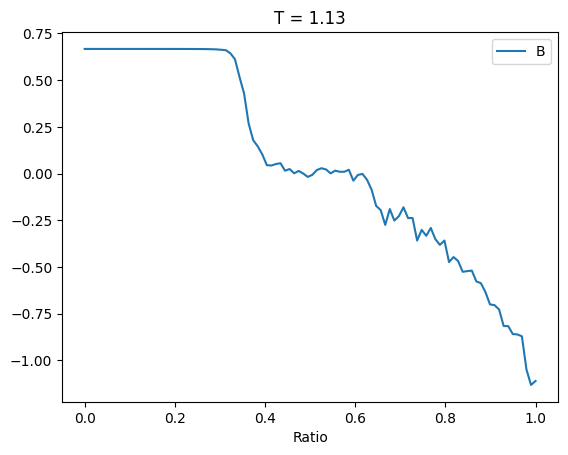

In [121]:
idx = 30
df[df.Temp == Ts[idx]].plot(x="Ratio", y=["B"], title=f"T = {Ts[idx]:0.2f}")

In [132]:
U_matrix = np.zeros((N, N))

for i, T in enumerate(Ts):
    U_matrix[i, :] = df[df.Temp == T]['B']

Text(0, 0.5, 'T')

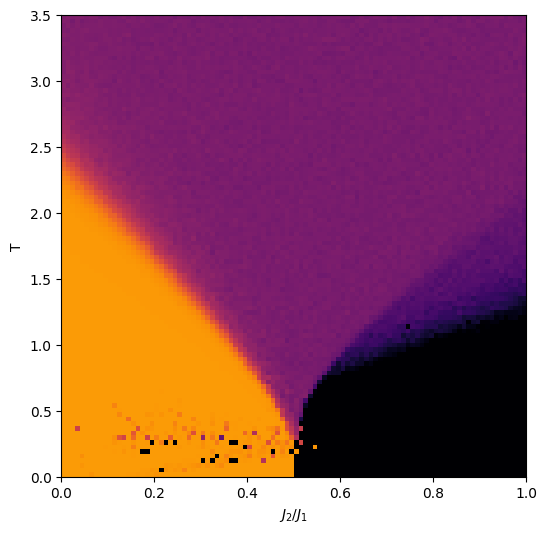

In [133]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(U_matrix[::-1, :], vmax=1, vmin=-0.5, extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax.set_xlabel(r'$J_2$/$J_1$')
ax.set_ylabel("T")